In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report


In [3]:
# Loading the dataset
df = pd.read_csv('drive/My Drive/Colab Notebooks/Dataset/telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
df.shape

(3333, 11)

In [5]:
#Check the missing values

total = df.isnull().sum().sort_values(ascending=False)
total

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [8]:
#Check unique value for each feature for more understanding

# for col in list(df.select_dtypes(['object']).columns):
for col in list(df.columns):
    print(f'{col}, Unique value = {len(df[col].unique())}')
    print(f'{df[col].unique()} \n')

Churn, Unique value = 2
[0 1] 

AccountWeeks, Unique value = 212
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221] 

ContractRenewal, Unique value = 2
[1 0] 

DataPlan, Unique value = 2
[1 

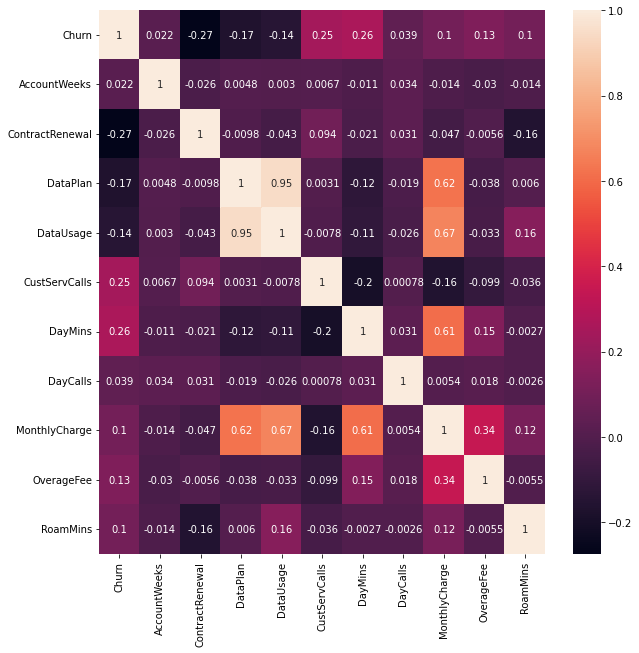

In [16]:
#EDA
#Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)

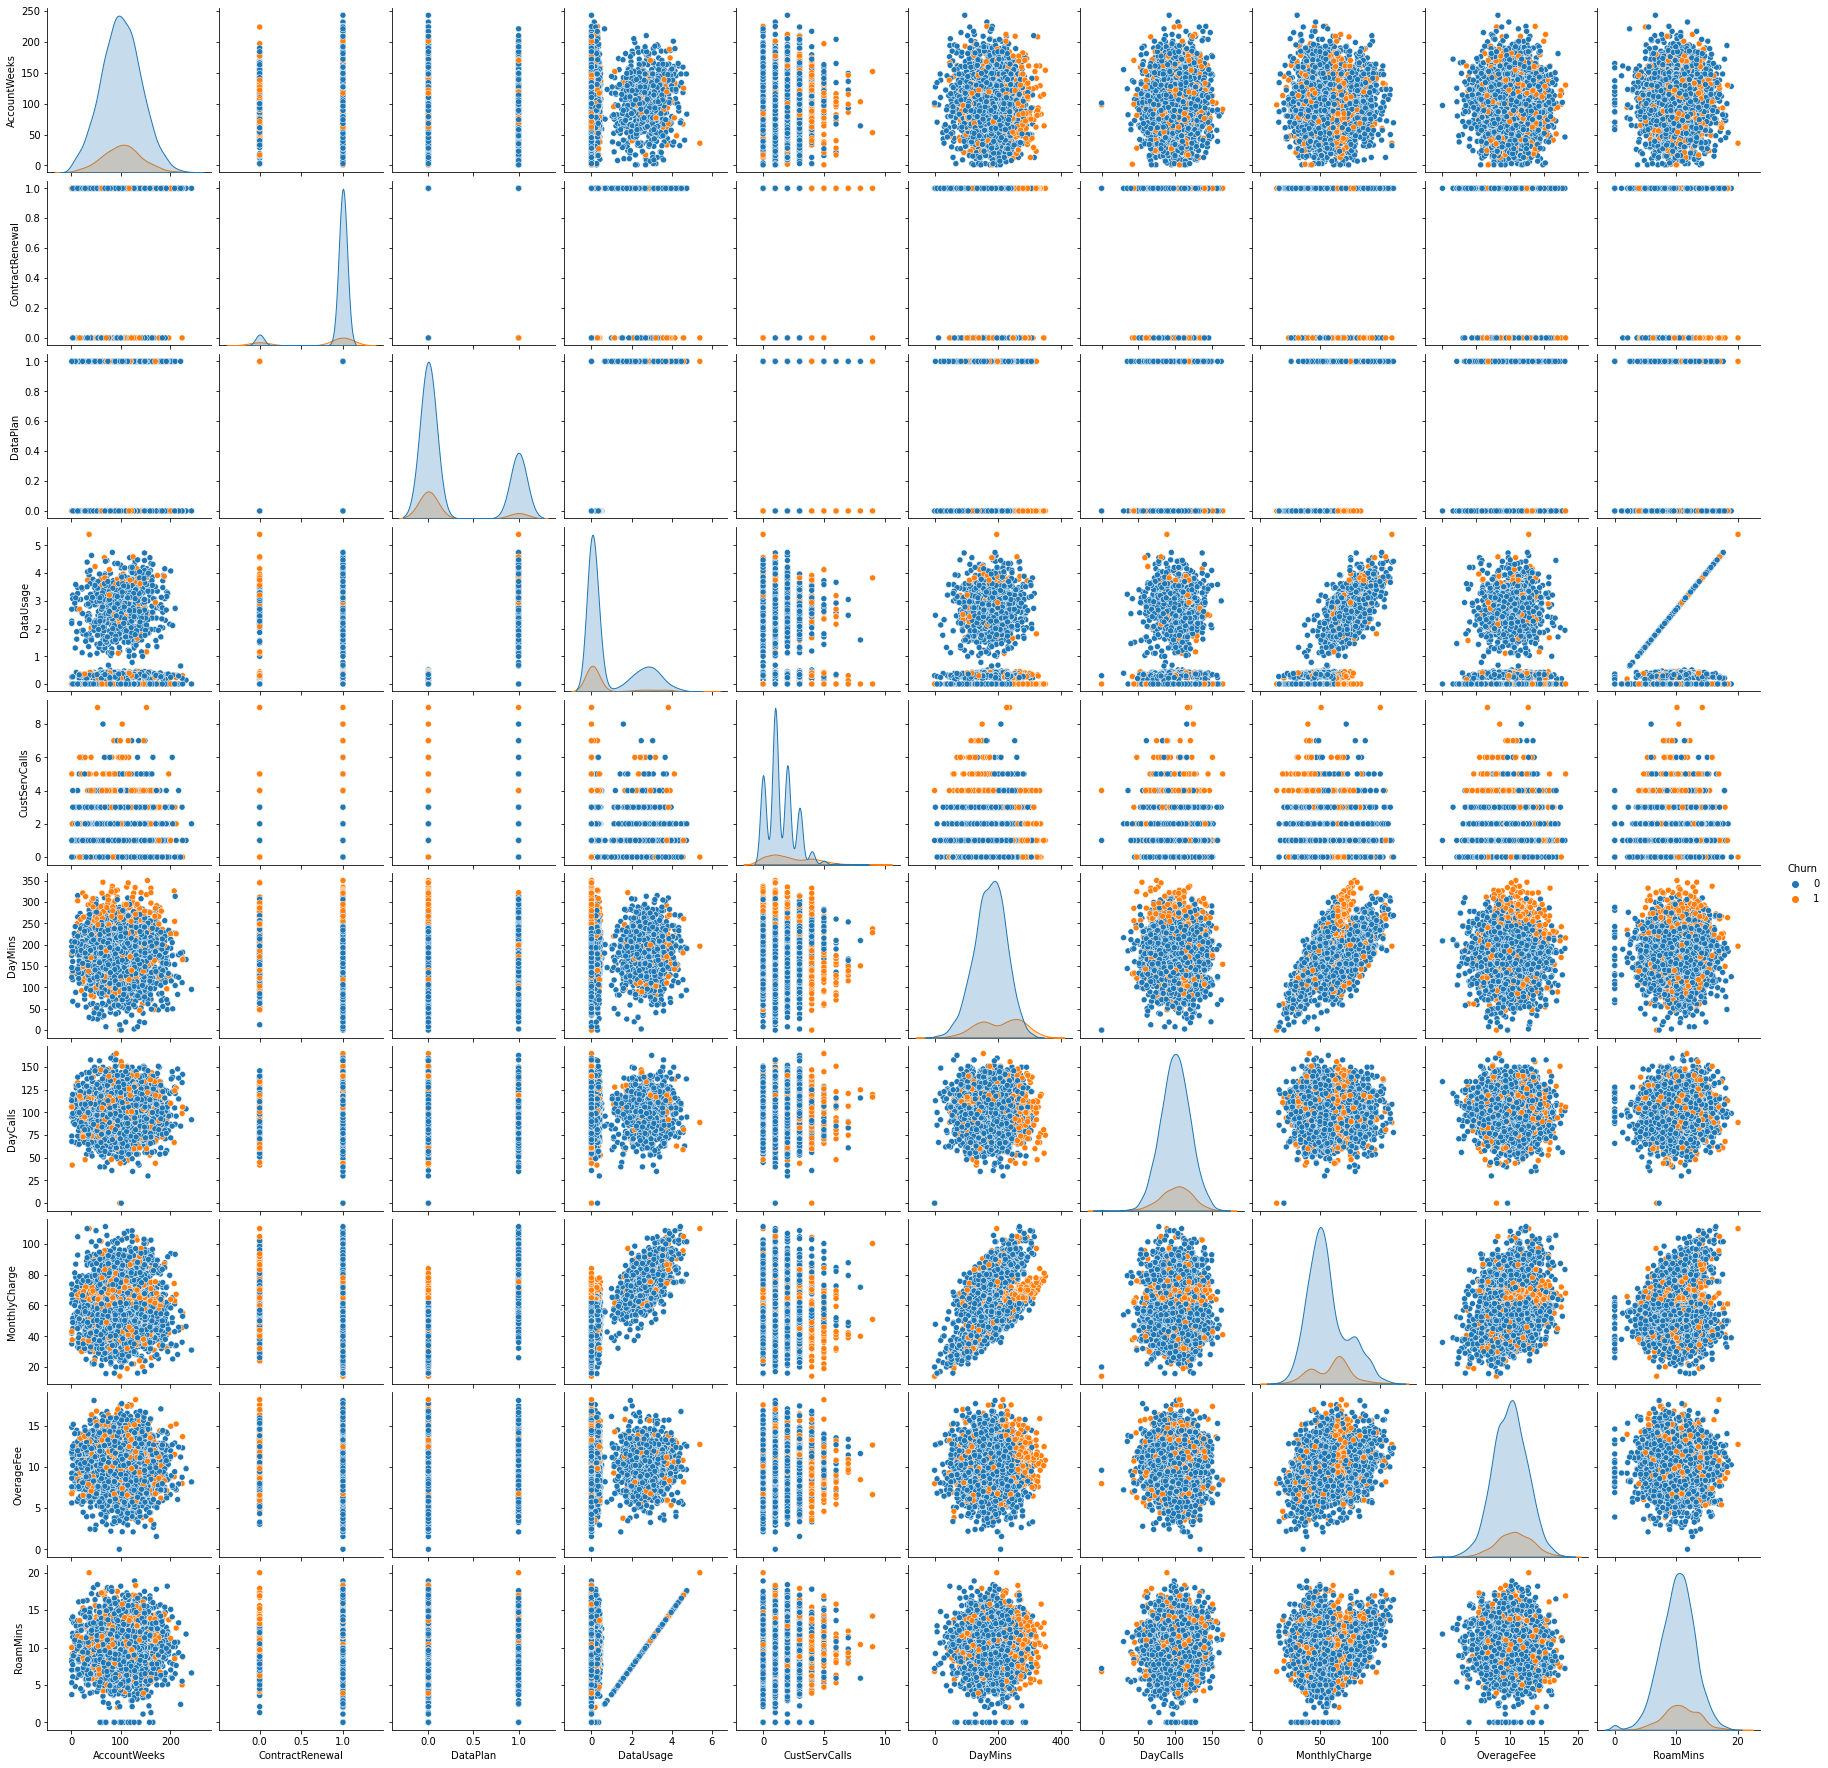

In [9]:
#EDA
sns.pairplot(df, hue="Churn")
plt.show()

In [7]:
# As this is a classification task, check the classes quantity.

print(f'''Churn '1' = {df.Churn[df['Churn'] == 1].count()}''')
print(f'''Churn '0' = {df.Churn[df['Churn'] == 0].count()}''')

Churn '1' = 483
Churn '0' = 2850


In [10]:
#Imbalance use oversampling
from sklearn.utils import resample

df_0 = df.loc[df['Churn']==0]
df_1 = df.loc[df['Churn']==1]


n_0 = len(df_0)
n_1 = len(df_1)

#oversampling
df_oversamping = resample(df_1, replace = True, n_samples = n_0, random_state = 123)
df = pd.concat([df_oversamping, df_0])
df = df.sample(frac=1)
df.reset_index(drop=True, inplace=True)

0    2850
1    2850
Name: Churn, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


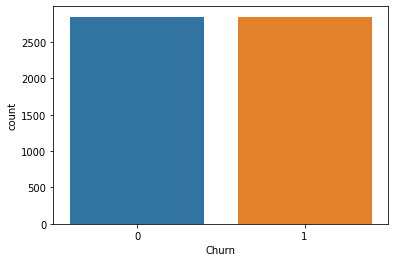

In [11]:
#After oversampling

print(df['Churn'].value_counts())

sns.countplot(df['Churn'])
plt.show()

In [12]:
#Model, no need to encoder

X = df.loc[:, df.columns !='Churn']
y = df['Churn']

from sklearn.model_selection import train_test_split as split

data_train, data_test, target_train, target_test = split(X, y, test_size=0.3, random_state=42)

#Model Logistic Regression

from sklearn.linear_model import LogisticRegression as ls
model = ls()
model = model.fit(data_train, target_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [13]:
#Evaluation
target_predicted = model.predict(data_test)

model.score(data_test, target_test)

0.7654970760233918

In [14]:
#Classification report

print(classification_report(target_test, target_predicted))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       842
           1       0.79      0.74      0.76       868

    accuracy                           0.77      1710
   macro avg       0.77      0.77      0.77      1710
weighted avg       0.77      0.77      0.77      1710

